# House Prices Regression Analysis

####  Importing Libraries

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


## Step: 1 - Load the Dataset - Training and Test

In [248]:
# Load dataset
training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#### Displaying Training Dataset

In [249]:
training_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [250]:
# Displaying Training Dataset - info
training_df.info() # 80 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### The training and Test dataset contains 81 columns, including both numerical and categorical types.

## EDA

### House Price Distribution

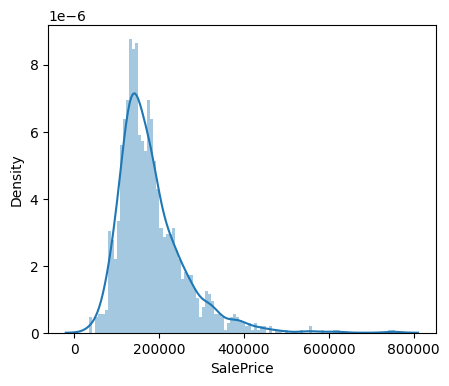

In [253]:
plt.figure(figsize=(5,4))
sns.distplot(training_df['SalePrice'], bins=100, kde=True)
plt.show()

### Plot the distribution for all the numerical features.

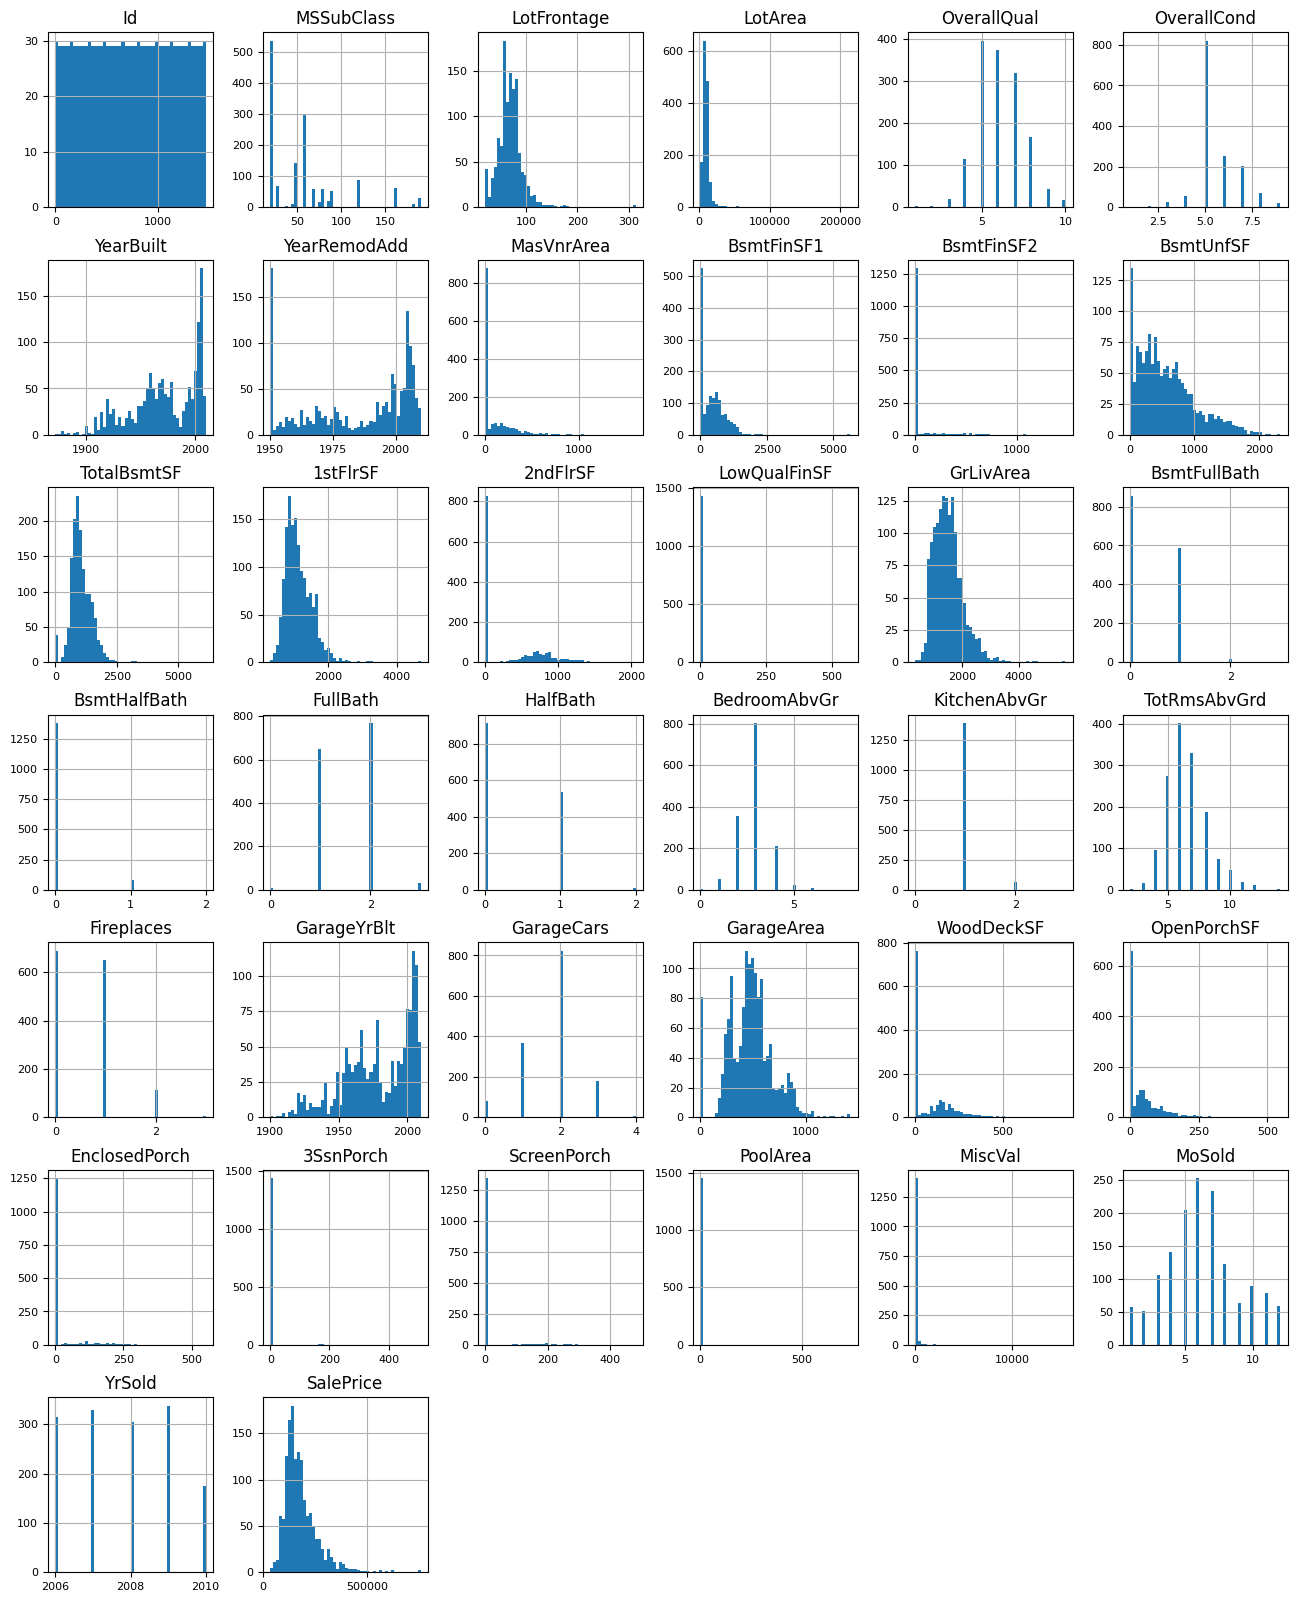

In [254]:
df_num = training_df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Display Categorical Column and their unique value count

Number of Unique Categorical column -  43


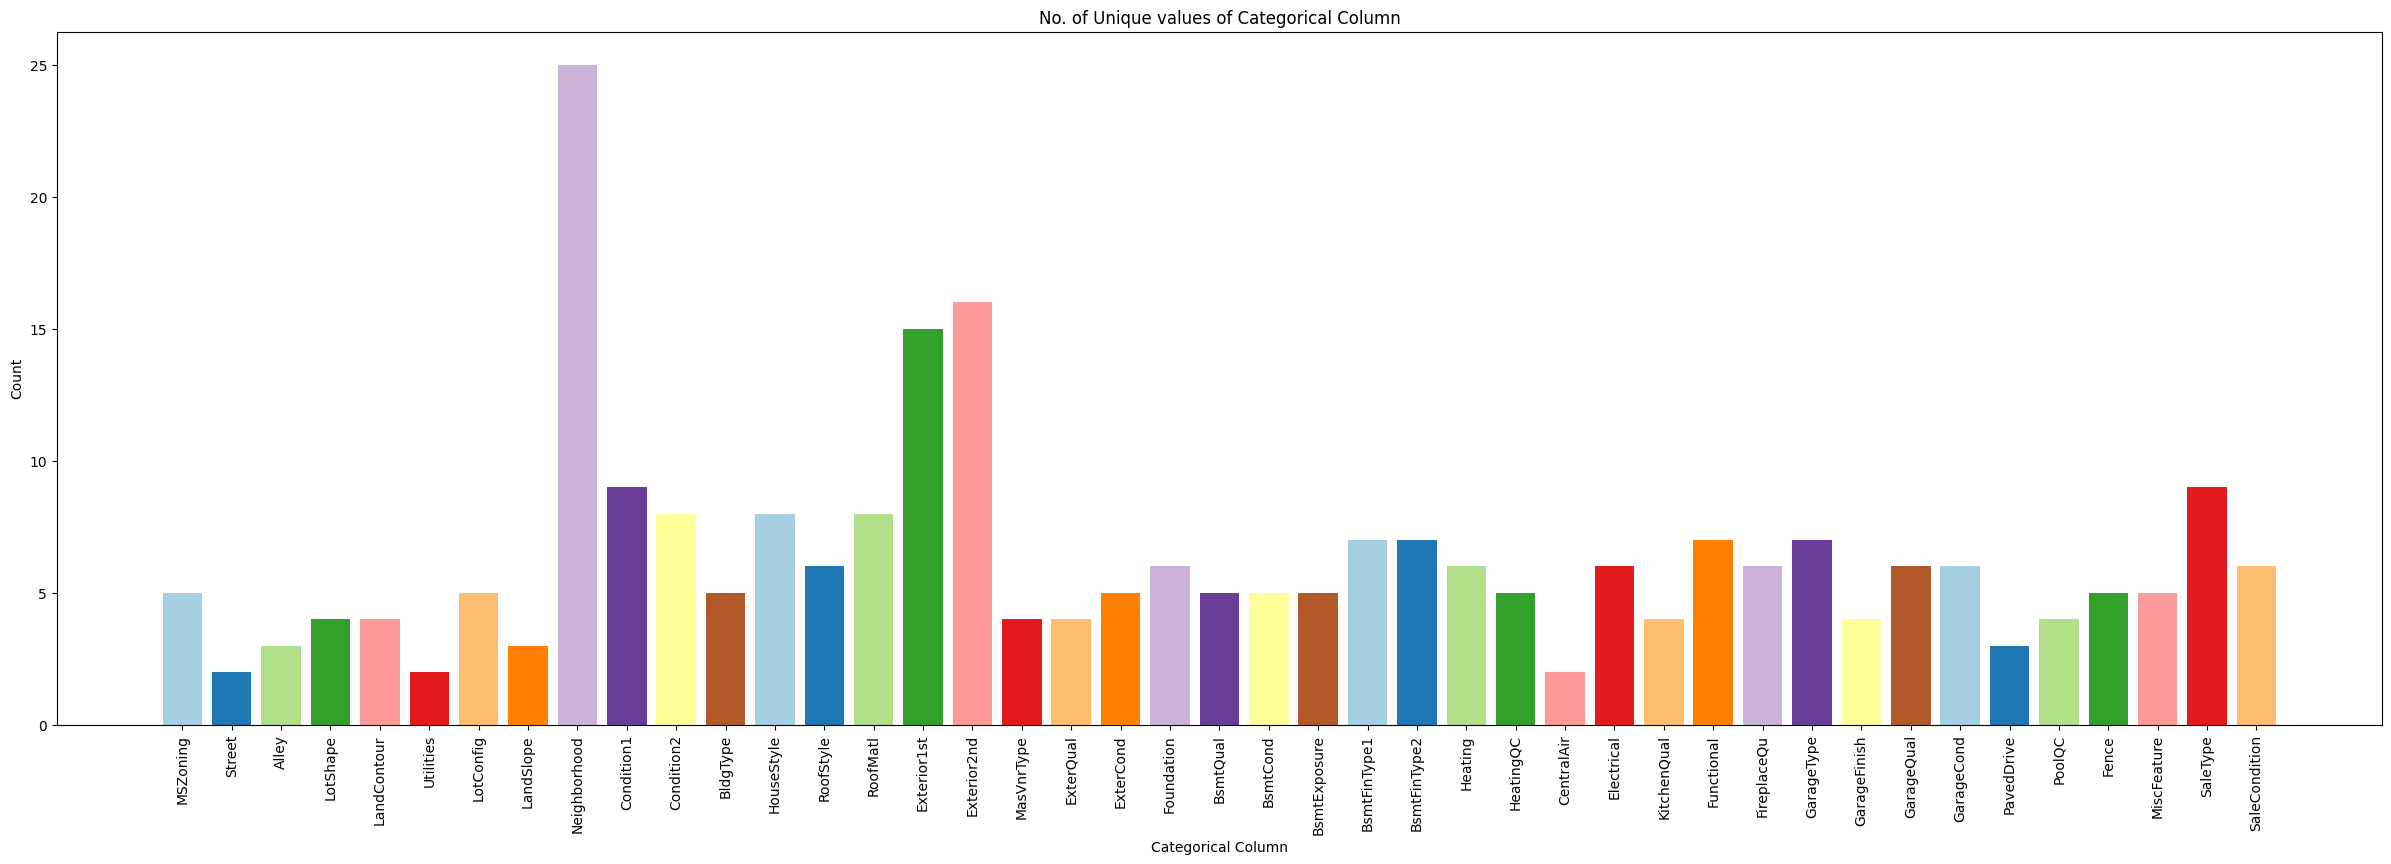

In [255]:
obj = (training_df.dtypes == 'object')
Catg_cols = list(obj[obj].index)
unique_vals = []

colors = sns.color_palette("Paired", n_colors=43)  # other palettes = "Set1", "Paired", etc.

for col in Catg_cols:
    unique_vals.append(training_df[col].unique().size)

print("Number of Unique Categorical column - ", len(Catg_cols))

plt.figure(figsize=(30,9))
plt.title('No. of Unique values of Categorical Column')
plt.xlabel('Categorical Column')
plt.ylabel('Count')
plt.bar(Catg_cols, unique_vals, color=colors)
plt.xticks(rotation=90)
plt.show()

## Step: 2 - Data Preprocessing

### Identifying Duplicates and Missing Values

In [256]:
# Training Dataset
Train_Dup = (training_df.duplicated(keep='first'))

# Prints only the duplicate rows
print(training_df[Train_Dup])       # 0 Duplicates Found

# Test DataSet
Test_Dup = (test_df.duplicated(keep='first'))

# Prints only the duplicate rows
print(test_df[Test_Dup])            # 0 Duplicates Found

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
Empty

In [257]:
# Identifying Missing Values and Count

# Training Dataset
Train_Miss_Val = training_df.isnull().sum()
Train_Miss_Count = Train_Miss_Val[Train_Miss_Val > 0]
print(Train_Miss_Count, '\n')

# Test DataSet
Test_Miss_Val = test_df.isnull().sum()
Test_Miss_Count = Test_Miss_Val[Test_Miss_Val > 0]
print('\n',Test_Miss_Count)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 


 MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual       

#### Duplicates - 
* Both the training and test datasets have no duplicates.

#### Missing Values - 
* Both the training and test datasets contain multiple missing values.

#### Handling Missing Values -- Categorical Columns

* Few columns - Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 -  NA - represents meaningful value.
* Replacing those NA with meaningful missing values

In [258]:

meaningful_miss_vals = {
    'Alley':'NoAlley',
    'MasVnrType' : 'NoMasVnr',
    'FireplaceQu':'NoFire',
    'PoolQC':'NoPool',
    'Fence':'NoFence',
    'MiscFeature':'NoMisc',

    'BsmtQual':'NoBsmt',
    'BsmtCond':'NoBsmt',
    'BsmtExposure':'NoBsmt',
    'BsmtFinType1':'NoBsmt',
    'BsmtFinType2':'NoBsmt',

    'GarageType':'NoGrg',
    'GarageFinish':'NoGrg',
    'GarageQual':'NoGrg',
    'GarageCond':'NoGrg'
}

# Training DataSet - Replacing NA with meaningful missing values

for col, val in meaningful_miss_vals.items():
    if col in training_df.columns:
        training_df[col] = training_df[col].fillna(val)

Train_Miss_Val = training_df.isnull().sum()
Train_Miss_Count = Train_Miss_Val[Train_Miss_Val > 0]

# Prints the columns with missing values - yet to handle
print(Train_Miss_Count)


LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64


#### Handling Missing Values -- Numerical Columns

* "GarageYrBlt" → Set to None if no garage (GarageType = 'NoGrg').

* "LotFrontage" → Filled with median value to avoid outliers.

* "MasVnrArea" → Replaced with 0 (assuming no masonry veneer).

* "Electrical" → Rows with missing values dropped to avoid incorrect assumptions.

In [259]:
# Handling Numerical columns Missing Values -- Training DataSet

# Column - GarageYrBlt is dependent on GarageType column
# Hence GarageYrBlt cannot be substituted with Mean/ Median value
training_df.loc[(training_df['GarageType'] == 'NoGrg'), 'GarageYrBlt'] = None

# Calculating Median Value for column - LotFrontage
Lot_Median = training_df['LotFrontage']. median()
training_df['LotFrontage'] = training_df['LotFrontage'].fillna(Lot_Median)

# Assigning 0 to missing value for column - MasVnrArea
training_df['MasVnrArea'] = training_df['MasVnrArea'].fillna(0)

# Drop rows where column - 'Electrical' is Null
training_df = training_df.dropna(subset=['Electrical'])

Miss_Val = training_df.isnull().sum()
Miss_Count = Miss_Val[Miss_Val > 0]
print(Miss_Count)

GarageYrBlt    81
dtype: int64


In [260]:
# Test DataSet - Replacing NA with meaningful missing values
for col, val in meaningful_miss_vals.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(val)

Test_Miss_Val = test_df.isnull().sum()
Test_Miss_Count = Test_Miss_Val[Test_Miss_Val > 0]

# Prints the columns with missing values - yet to handle
print(Test_Miss_Count)


MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


In [261]:
# Handling Numerical columns Missing Values -- Test DataSet

# Column - GarageYrBlt is dependent on GarageType column
# Hence GarageYrBlt cannot be substituted with Mean/ Median value
test_df.loc[(test_df['GarageType'] == 'NoGrg'), 'GarageYrBlt'] = None

# Calculating Median Value for column - LotFrontage, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea
Numcolumns_to_fill = ['LotFrontage', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
test_df[Numcolumns_to_fill] = test_df[Numcolumns_to_fill].fillna(test_df[Numcolumns_to_fill].median())

# Assigning 0 to missing value for column - MasVnrArea,
test_df[['MasVnrArea','BsmtFinSF2','BsmtFinSF1']] = test_df[['MasVnrArea','BsmtFinSF2','BsmtFinSF1']].fillna(0)

CatCol_to_fill = ['MSZoning', 'Utilities', 'KitchenQual', 'Functional', 'SaleType','Exterior1st','Exterior2nd']
for column in CatCol_to_fill:
    mode_value = test_df[column].mode()[0]  # Get the mode (most frequent value) of the column
    test_df[column] = test_df[column].fillna(mode_value)  # Replace NaN with the mode


Miss_Val = test_df.isnull().sum()
Miss_Count = Miss_Val[Miss_Val > 0]
print(Miss_Count)


GarageYrBlt    78
dtype: int64


#### Ordinal Encoding -- Training and Test Dataset

In [262]:

Ordinal_category_orders = {

    'ExterCond'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterQual'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'HeatingQC'   : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual'    : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt' : 0},
    'BsmtCond'    : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBsmt' : 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NoBsmt' : 0},
    'BsmtFinType1': {'NoBsmt': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'NoBsmt': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'FireplaceQu' : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoFire' : 0},
    'GarageCond'  : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGrg' : 0},
    'GarageQual'  : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGrg' : 0},
    'GarageFinish': {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NoGrg' : 0 },
    'PoolQC'      : {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoPool' : 0}
}

# Gets the List of columns to encode
Ordinal_Cols = list(Ordinal_category_orders.keys())

# Apply Mapping - Training and Test Data
for col in Ordinal_Cols:
  training_df[col] = training_df[col].map(Ordinal_category_orders[col])
  test_df[col] = test_df[col].map(Ordinal_category_orders[col])


#### One-Hot Encoding

In [263]:
# Training DataSet - One-Hot Encoding

# Identify categorical columns
train_categorical_columns = training_df.select_dtypes(include=['object']).columns

#Apply One-Hot Encoding for remaining categorical column - Training
training_df_encoded = pd.get_dummies(training_df, columns=train_categorical_columns, drop_first=False).replace({True: 1, False: 0})

training_df_encoded.shape


(1459, 245)

In [264]:
# Test DataSet - One-Hot Encoding

# Identify categorical columns
Test_categorical_columns = test_df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding for remaining categorical column - Test
test_df_encoded = pd.get_dummies(test_df, columns=Test_categorical_columns, drop_first=False).replace({True: 1, False: 0})

test_df_encoded.shape


(1459, 228)

#### Handling the Column count mismatch and match test dataset column order to training dataset column order

In [265]:
# Training Data - 245columns Test Data - 228 Columns

# Identifies the Missing columns
Missing_Cols = set(training_df_encoded.columns) - set(test_df_encoded.columns)

print(len(Missing_Cols))

# Adding missing columns to the test set with default values 0
for cols in Missing_Cols:
  test_df_encoded[cols]=0

# Ensure that the columns in both the train and test data are in the same order
test_df_encoded = test_df_encoded[training_df_encoded.columns]

# test_df_encoded

# Checking is the Training and test dataset has the same column order
if list(training_df_encoded.columns) == list(test_df_encoded.columns):
  print("same")
else:
  print("different")

17
same


#### Problem
- Training data has **245 columns**, but test data has **228 columns**.
- Some categorical features exist in training but not in test data due to one-hot encoding.

#### Solution:
1. **Find missing columns in test data** (columns in training but absent in test).
2. **Add missing columns to test data** with a default value of `0`.
3. **Ensure column order is the same** in both training and test data.
4. **Verify column match** before model training.

## Step: 3 -  Model Training

#### Fixing skewness in data

Skewed data can make models less effective, as many machine learning models work better with normally distributed data.

* Check the Distribution → Plot the histogram to identify skewness.

<Axes: xlabel='SalePrice', ylabel='Density'>

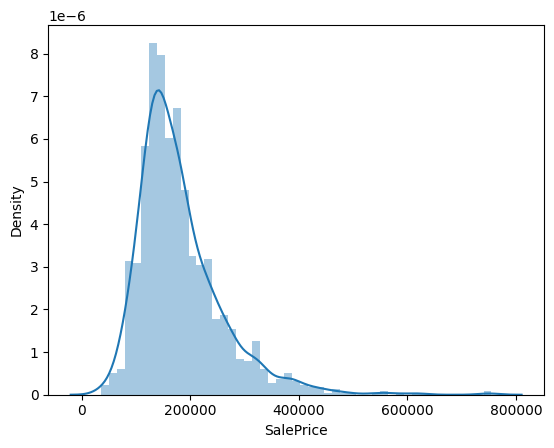

In [266]:
# Print sales price histogram larger to view skewness
sns.distplot(training_df_encoded['SalePrice'],  kde=True)

The SalePrice distribution is right-skewed, meaning there are extreme high values.

**Solution:**
* Apply log transformation (np.log1p()) to normalize.
* Plot transformed distribution to confirm improvement.

<Axes: xlabel='SalePrice', ylabel='Density'>

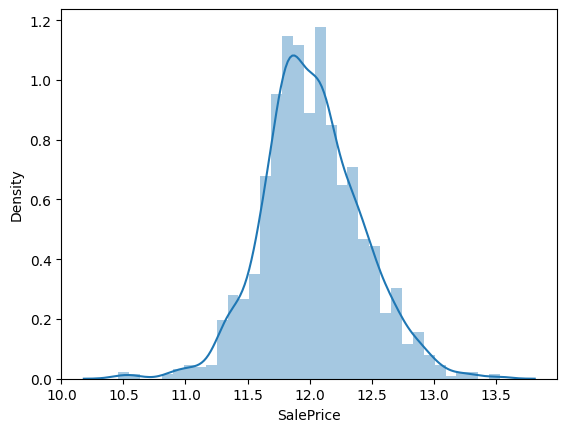

In [267]:
training_df_encoded['SalePrice']=np.log1p(training_df_encoded['SalePrice'])
sns.distplot(training_df_encoded['SalePrice'], kde=True)

#### Result:
* Before: Right-skewed distribution.
* After: More normal, improving model performance.

### Split the training data set into training and test

In [268]:
# Separate features (X) and target (y) from training data
X = training_df_encoded.drop(columns=['SalePrice', 'Id'], axis=1)  # Drop SalePrice and Id
y = training_df_encoded['SalePrice']

In [269]:
# Split the training data set into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [270]:
print("Missing values in X_train:\n", X_train.isnull().sum()[X_train.isnull().sum() > 0])
print("\nMissing values in X_test:\n", X_test.isnull().sum()[X_test.isnull().sum() > 0])

Missing values in X_train:
 GarageYrBlt    65
dtype: int64

Missing values in X_test:
 GarageYrBlt    16
dtype: int64


In [271]:
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train.loc[X_train.index]  # Keep y_train aligned
y_test = y_test.loc[X_test.index]

In [272]:
# Train a LinearRegression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict with the test model
y_pred_lr = lr.predict(X_test)

In [273]:
# Train a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict with the test model
y_pred_rf = rf.predict(X_test)

## Step: 4 - Performance Evaluation

In [274]:
# Calculate Mean Squared Error and R^2 on training data
print('Linear Regression Model - Performance Evaluation: \n')
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Root Mean Squared Error: {rmse_lr}')
print(f'Mean Absolute Error: {mae_lr}')
print(f'R-squared: {r2_lr}')

Linear Regression Model - Performance Evaluation: 

Root Mean Squared Error: 0.12698845231119538
Mean Absolute Error: 0.08459373710883106
R-squared: 0.8992249861131487


In [275]:
# Calculate Mean Squared Error and R^2 on training data
print('RandomForest Model - Performance Evaluation:\n')
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Root Mean Squared Error: {rmse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R-squared: {r2_rf}')

RandomForest Model - Performance Evaluation:

Root Mean Squared Error: 0.15185913190352268
Mean Absolute Error: 0.10122257968501486
R-squared: 0.8558859802323097


#### Hyper parameter tuning

In [276]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# best_rf = grid_search.best_estimator_
best_rf = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],  
                                max_depth=grid_search.best_params_['max_depth'], 
                                random_state=42)
# print("Best Random Forest Parameters:", grid_search.best_params_)

best_rf.fit(X_train, y_train) 
y_pred_best_rf = best_rf.predict(X_test)

rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print results
print("Optimized Random Forest Model - Performance Evaluation: \n")
print(f"Root Mean Squared Error (RMSE): {rmse_best_rf}")
print(f"Mean Absolute Error (MAE): {mae_best_rf}")
print(f"R-squared (R²): {r2_best_rf}")


Optimized Random Forest Model - Performance Evaluation: 

Root Mean Squared Error (RMSE): 0.15130210313674103
Mean Absolute Error (MAE): 0.1005657247628176
R-squared (R²): 0.8569412796489302


### Predict on Actual Test Dataset

In [277]:
# x_valid_df = test_df_encoded.drop(columns=['Id'], axis=1
X_valid_df = test_df_encoded.drop(columns=['Id', 'SalePrice'], errors='ignore')  # `errors='ignore'` prevents crashing if "SalePrice" isn't there

# Predict with actual test_df data
predictions = best_rf.predict(X_valid_df)

### Visualize the Predicted and Actual Values of the model

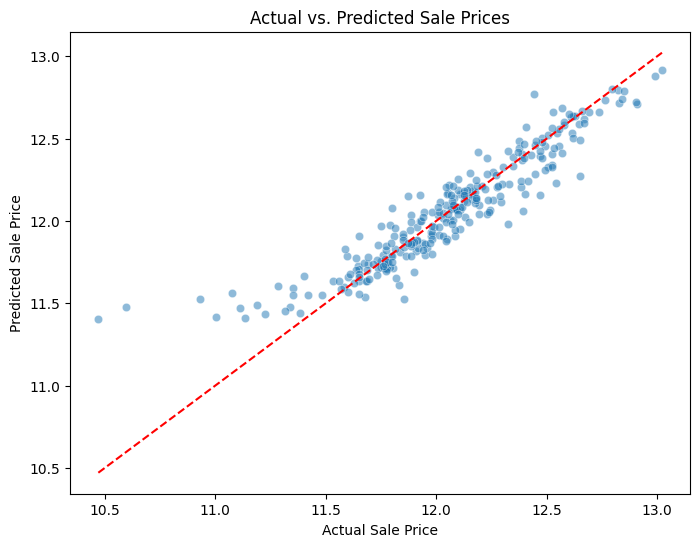

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.5)

# Reference line (Perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices")
plt.show()


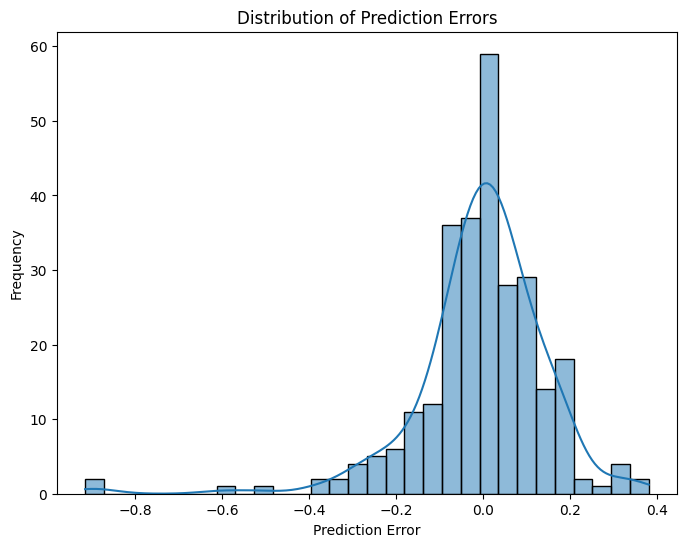

In [279]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)  # kde=True adds a smooth curve

plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


## CONCLUSION:

#### * Since most points are clustered near the red dashed line (y = x), the model is making reasonably accurate predictions.
#### * Some variations are expected, but if the spread is small, the model is performing effectively.